In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
ds=pd.read_csv('census2015.csv')


In [4]:
ds.tail()[['Income','IncomePerCap','Poverty','ChildPoverty']]

,Income,IncomePerCap,Poverty,ChildPoverty
73996,21188.0,8474.0,40.7,59.9
73997,25781.0,10788.0,32.8,28.0
73998,17284.0,8524.0,56.6,83.5
73999,22083.0,9907.0,39.9,34.6
74000,7953.0,4806.0,76.8,75.3


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
CensusTract        74001 non-null int64
State              74001 non-null object
County             74001 non-null object
TotalPop           74001 non-null int64
Men                74001 non-null int64
Women              74001 non-null int64
Hispanic           73311 non-null float64
White              73311 non-null float64
Black              73311 non-null float64
Native             73311 non-null float64
Asian              73311 non-null float64
Pacific            73311 non-null float64
Citizen            74001 non-null int64
Income             72901 non-null float64
IncomeErr          72901 non-null float64
IncomePerCap       73261 non-null float64
IncomePerCapErr    73261 non-null float64
Poverty            73166 non-null float64
ChildPoverty       72883 non-null float64
Professional       73194 non-null float64
Service            73194 non-null float64
Office             73

In [59]:
pov=ds.loc[:,['County','TotalPop','Poverty','ChildPoverty','Employed','Unemployment','Income','IncomePerCap']]
pov.corr()

,TotalPop,Poverty,ChildPoverty,Employed,Unemployment,Income,IncomePerCap
TotalPop,1.000000,-0.151850,-0.146436,0.923397,-0.126168,0.174527,0.033604
Poverty,-0.151850,1.000000,0.897260,-0.319605,0.637417,-0.702208,-0.606543
ChildPoverty,-0.146436,0.897260,1.000000,-0.310756,0.598072,-0.663684,-0.585279
Employed,0.923397,-0.319605,-0.310756,1.000000,-0.301060,0.318049,0.204324
Unemployment,-0.126168,0.637417,0.598072,-0.301060,1.000000,-0.483252,-0.463069
Income,0.174527,-0.702208,-0.663684,0.318049,-0.483252,1.000000,0.834342
IncomePerCap,0.033604,-0.606543,-0.585279,0.204324,-0.463069,0.834342,1.000000


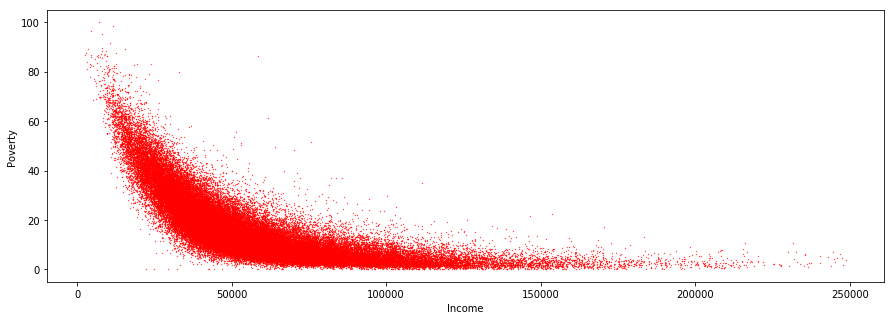

In [65]:
plt.clf()
ax=pov.plot(kind='scatter',x='Income',y='Poverty',figsize=(15,5),color='red',s=0.1)
plt.show()

In [240]:
f=ds.iloc[:,[1,3,6,7,8,9,10,11]]
tp=f.loc[:,'TotalPop']*0.01
#f['TotalPop']
ite=2
li=['hisp','whitp','blackp','natip','asianp','pacip']
for i in li:
    f[i]=pd.Series.multiply(tp,f.iloc[:,ite])
    ite+=1

f.head(20)

/Users/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,hisp,whitp,blackp,natip,asianp,pacip
0,Alabama,1948,0.9,87.4,7.7,0.3,0.6,0.0,17.532,1702.552,149.996,5.844,11.688,0.000
1,Alabama,2156,0.8,40.4,53.3,0.0,2.3,0.0,17.248,871.024,1149.148,0.000,49.588,0.000
2,Alabama,2968,0.0,74.5,18.6,0.5,1.4,0.3,0.000,2211.160,552.048,14.840,41.552,8.904
3,Alabama,4423,10.5,82.8,3.7,1.6,0.0,0.0,464.415,3662.244,163.651,70.768,0.000,0.000
4,Alabama,10763,0.7,68.5,24.8,0.0,3.8,0.0,75.341,7372.655,2669.224,0.000,408.994,0.000
5,Alabama,3851,13.1,72.9,11.9,0.0,0.0,0.0,504.481,2807.379,458.269,0.000,0.000,0.000
6,Alabama,2761,3.8,74.5,19.7,0.0,0.0,0.0,104.918,2056.945,543.917,0.000,0.000,0.000
7,Alabama,3187,1.3,84.0,10.7,3.1,0.0,0.0,41.431,2677.080,341.009,98.797,0.000,0.000
8,Alabama,10915,1.4,89.5,8.4,0.0,0.0,0.0,152.810,9768.925,916.860,0.000,0.000,0.000
9,Alabama,5668,0.4,85.5,12.1,0.0,0.3,0.0,22.672,4846.140,685.828,0.000,17.004,0.000


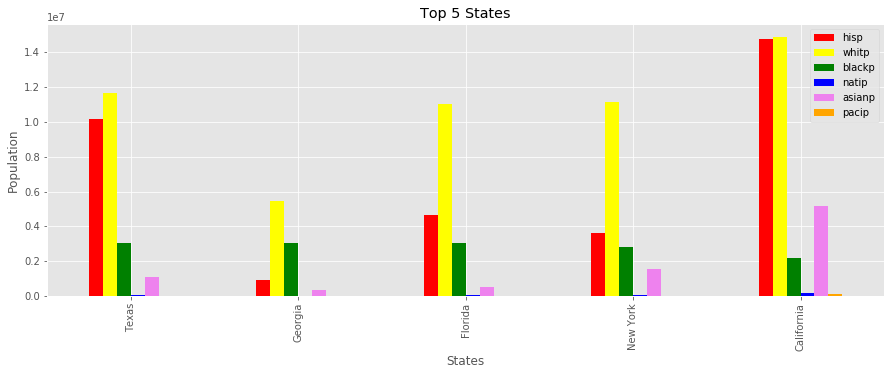

In [241]:
#f.head()
plt.clf()
b1=f.groupby('State').sum().loc[:,['hisp','whitp','blackp','natip','asianp','pacip']].sort_values(by='blackp',ascending=False)
b1
c=['red','yellow','green','blue','violet','orange']
ax=b1.head(5).plot.bar(figsize=(15,5),title='Top 5 States',color=c)
ax.set(xlabel='States',ylabel='Population')
plt.show()

/Users/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


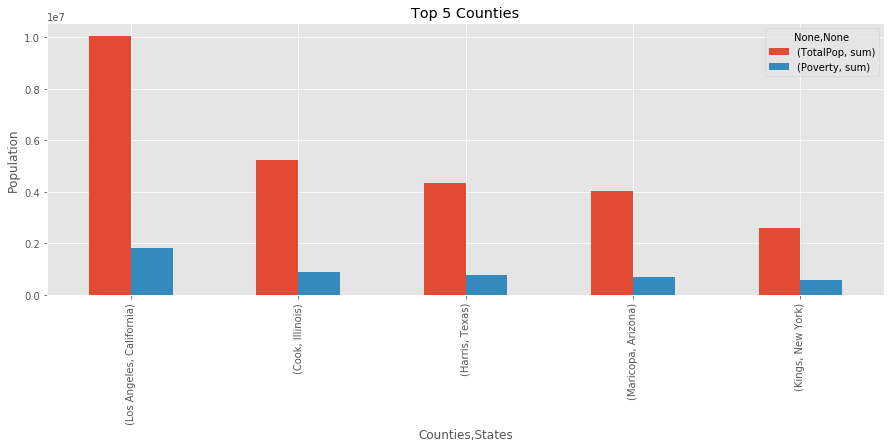

In [242]:
s=ds[['State','TotalPop','County','Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty']]
s.columns.values[-1]='P%'
s['Poverty']=s['P%']*ds['TotalPop']*0.01

func={'TotalPop':['sum'],'Poverty':['sum']}
i=s.groupby(['County','State']).agg(func)
i.sort_values(('Poverty', 'sum'),inplace=True,ascending=False)
ax=i.head(5).plot.bar(figsize=(15,5),title='Top 5 Counties')
ax.set(xlabel='Counties,States',ylabel='Population')
plt.show()
#i.sort_values('Income')
#apply(lambda x: x.sort_values(['B', 'C']))
#i=s.groupby(['County','State'])['IncomePerCap'].agg(['sum','count'])
#i.sort(['County','Income'],ascending=False)

/Users/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


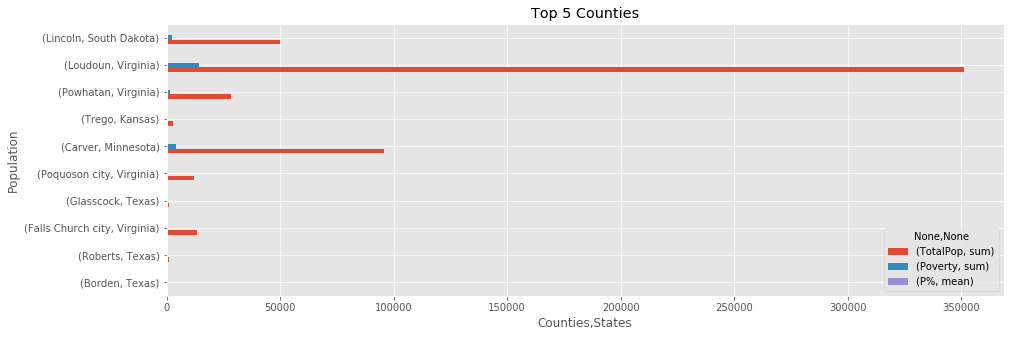

In [243]:
s=ds[['State','TotalPop','County','Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty']]
s.columns.values[-1]='P%'
s['Poverty']=s['P%']*ds['TotalPop']*0.01

func={'TotalPop':['sum'],'Poverty':['sum'],"P%":['mean']}
i=s.groupby(['County','State'],as_index=True).agg(func)
i.sort_values([('P%', 'mean'),('Poverty','sum')],inplace=True,ascending=True)
ax=i.head(10).plot.barh(figsize=(15,5),title='Top 5 Counties')
ax.set(xlabel='Counties,States',ylabel='Population')
plt.show()
#i.sort_values('Income')
#apply(lambda x: x.sort_values(['B', 'C']))
#i=s.groupby(['County','State'])['IncomePerCap'].agg(['sum','count'])
#i.sort(['County','Income'],ascending=False)

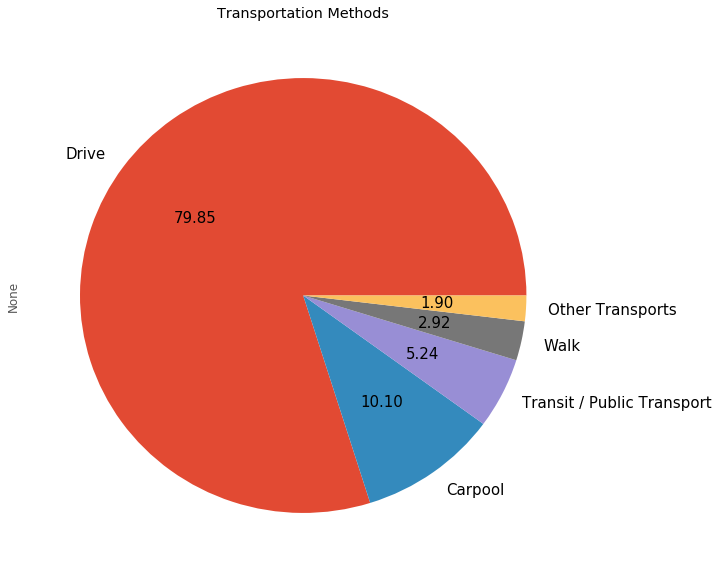

In [244]:
li=['Drive','Carpool','Transit','Walk','OtherTransp']
f=ds[li]
tp=ds['TotalPop']*0.01
#f['TotalPop']
nf=f.mul(tp, axis=0)
nf.mean()
nf.mean().plot.pie(title='Transportation Methods',figsize=(10,10),fontsize=15
                  ,labels=['Drive','Carpool','Transit / Public Transport','Walk','Other Transports']
                  ,autopct='%.2f')
plt.show()
plt.clf()

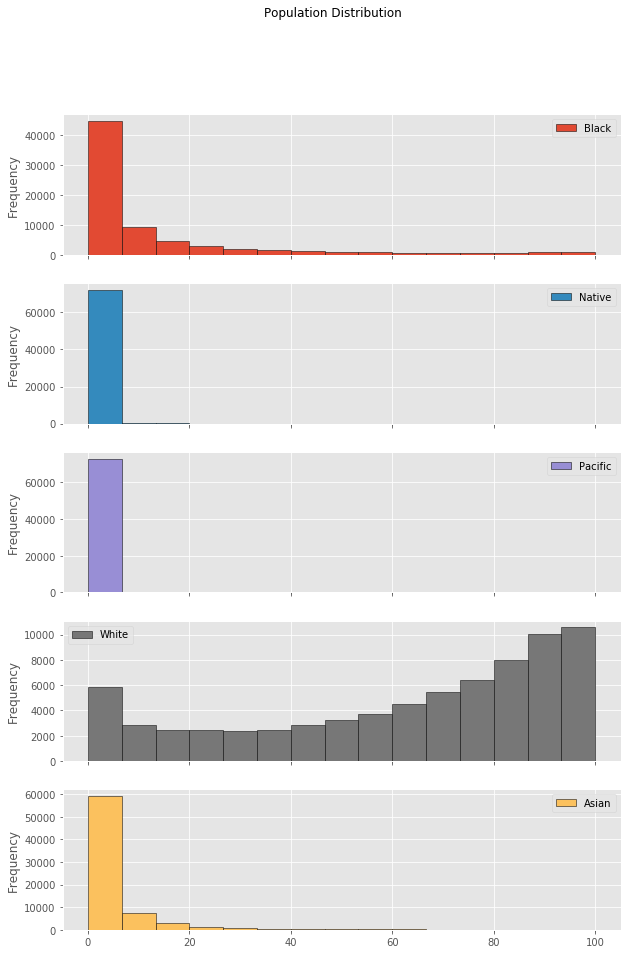

In [245]:
plt.clf()

ds[['Black','Native','Pacific','White','Asian']].plot.hist(bins=15,ec='black',subplots=True,figsize=(10,15),title="Population Distribution")
plt.show()

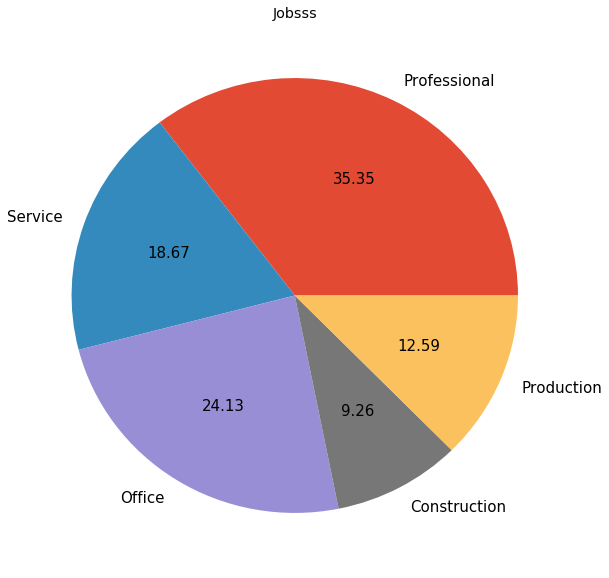

   Professional   Service    Office  Construction  Production
0       675.956   331.160   414.924       231.812     296.096
1       480.788   532.532   463.540       202.664     474.320
2       931.952   739.032   655.928       273.056     368.032
3      1194.210   919.984  1194.210       384.801     725.372
4      5338.448  1528.346  1958.866       226.023    1700.554


In [254]:
li=['Professional','Service','Office','Construction','Production']
f=ds[li]
tp=ds['TotalPop']*0.01
#f['TotalPop']
nf=f.mul(tp, axis=0)
nf.mean()
ax=nf.mean().plot.pie(title='Jobsss',figsize=(10,10),fontsize=15
                  ,labels=li
                  ,autopct='%.2f'
                  )
ax.set(ylabel='')
plt.show()
plt.clf()
print(nf.head())

In [265]:
co=ds.corr()
co=co[((co<1) & (co>0.8) )| ( (co>-1) &(co<-.8) )]
co.loc[:,['Pacific':]]


SyntaxError: invalid syntax (<ipython-input-265-d44782359aa7>, line 3)